# Agregacija združevanje in tranformacija podatkov


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("mode.copy_on_write", True)

## Nalaganje in urejenje podatkov

In [5]:
happiness_2015 = pd.read_csv("data/World_Happiness_2015.csv")
happiness_2015.head(2)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201


In [6]:
happiness_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
happiness_2015["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

## Agregacija podatkov

Izračun povprečnega scora sreče za posamezno regijo.

In [14]:
# 1. način - ni priporočen!
regions = happiness_2015["Region"].unique()
mean_happiness = {}

for region in regions:
    #1. Split the dataframe into groups.
    region_group = happiness_2015.loc[happiness_2015["Region"] == region]
    #2. Apply a function to each group.
    region_mean_score = region_group["Happiness Score"].mean()
    #3. Combine the results into one data structure.
    mean_happiness[region] = region_mean_score
    
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444444,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Southern Asia': 4.580857142857143}

[]

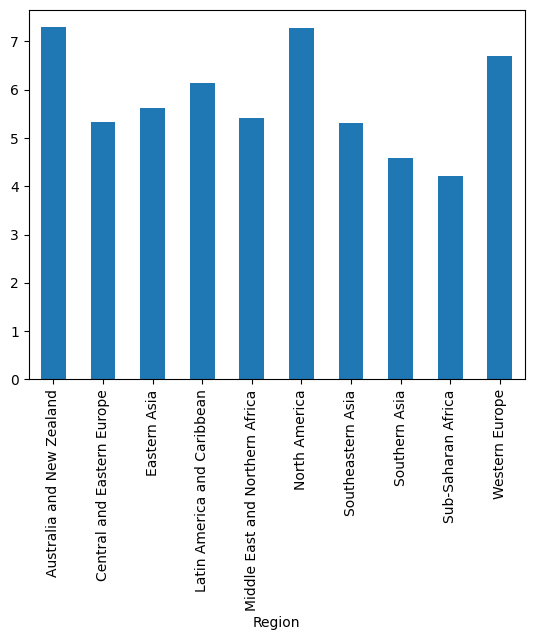

In [24]:
# 2. način: Uporaba GroupBy - PRAVILNO!
happiness_2015.groupby("Region")["Happiness Score"].mean().plot(kind="bar")
plt.plot()

### Več aggregaciij nad istimi podatki

In [27]:
def difference(group):
    return (group.max() - group.min())

happiness_2015.groupby("Region")["Happiness Score"].agg(["mean", "max", "min", difference])

,mean,max,min,difference
Region,,,,
Australia and New Zealand,7.285000,7.286,7.284,0.002
Central and Eastern Europe,5.332931,6.505,4.218,2.287
Eastern Asia,5.626167,6.298,4.874,1.424
Latin America and Caribbean,6.144682,7.226,4.518,2.708
Middle East and Northern Africa,5.406900,7.278,3.006,4.272
North America,7.273000,7.427,7.119,0.308
Southeastern Asia,5.317444,6.798,3.819,2.979
Southern Asia,4.580857,5.253,3.575,1.678
Sub-Saharan Africa,4.202800,5.477,2.839,2.638
